In [1]:
from os import listdir
from os.path import isfile, join
import re
import pandas as pd
import copy as cp
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loads the partition files in json format, returns a pandas dataFrame with the concatened data unordered
def LoadJsonData(mypath):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

    count=0
    nfiles=len(onlyfiles)
    for file in onlyfiles:
        print('importing file '+str(count+1)+' of '+str(nfiles))
        if count==0:
            data=pd.read_json(mypath+file)
        else:
            data=data.append(pd.read_json(mypath+file))
        count=count+1
    return data

In [3]:
def CleanNames(CellSerialNumber):
    if re.search('\.0', CellSerialNumber):
        pos_2=re.search('\.0', CellSerialNumber).start()
    else:
        pos_2=len(CellSerialNumber)
                
    if re.match('00', CellSerialNumber)==None and re.match('0', CellSerialNumber):
        pos_1=1
    else:
        pos_1=0
    return CellSerialNumber[pos_1:pos_2]

#Cleans Duplicates, Unnecessary columns, sorts by timeframe, resets the indexes, renomeia os cellSerialNumbers
def cleanRawData(data):
#Remover as colunas das cellIds visto que não interessam para o caso
    cellIdsList=['cellId_0','cellId_1','cellId_2','cellId_3','cellId_4','cellId_5','cellId_6','cellId_7']
    data=data.drop(cellIdsList, axis=1)
# Remover dados duplicados 
    data=data.drop_duplicates(subset='_id', keep="last")
# Ordenar por data
    data['timestamp']=pd.to_datetime(data['timestamp'])
    data=data.sort_values(by=['timestamp']) 
#Dar reset aos indexes
    data=data.reset_index(drop=True)
    
#Converter os cellSerialNumbers para strings
    a="cellSerialNumber_0"
    for i in range(8):
        #Transformar os cellSerialNumbers em strings
        data[a]=data[a].astype(str)
        #Remover o pattern ".0" da coluna cellSerialNumber_X do dataframe. Remover também o pattern de início "0" se o serialNumber não começar com "00".
        data[a]=data[a].apply(CleanNames)
        a=a.replace("cellSerialNumber_{}".format(i),"cellSerialNumber_{}".format(i+1))
        
    return data

### Loading and Cleaning the RawData

In [4]:
dataDir='D:/MEU/Universidade/Codigo Tese/Dados/weighings/'
AllRawData=LoadJsonData(dataDir)
AllCleanedData=cleanRawData(AllRawData)

importing file 1 of 40
importing file 2 of 40
importing file 3 of 40
importing file 4 of 40
importing file 5 of 40
importing file 6 of 40
importing file 7 of 40
importing file 8 of 40
importing file 9 of 40
importing file 10 of 40
importing file 11 of 40
importing file 12 of 40
importing file 13 of 40
importing file 14 of 40
importing file 15 of 40
importing file 16 of 40
importing file 17 of 40
importing file 18 of 40
importing file 19 of 40
importing file 20 of 40
importing file 21 of 40
importing file 22 of 40
importing file 23 of 40
importing file 24 of 40
importing file 25 of 40
importing file 26 of 40
importing file 27 of 40
importing file 28 of 40
importing file 29 of 40
importing file 30 of 40
importing file 31 of 40
importing file 32 of 40
importing file 33 of 40
importing file 34 of 40
importing file 35 of 40
importing file 36 of 40
importing file 37 of 40
importing file 38 of 40
importing file 39 of 40
importing file 40 of 40


In [5]:
AllRawData

,_id,timestamp,terminalSerialNumber,scaleSerialNumber,scaleGross,scaleNet,cellId_0,cellSerialNumber_0,cellWeight_0,cellId_1,...,cellWeight_4,cellId_5,cellSerialNumber_5,cellWeight_5,cellId_6,cellSerialNumber_6,cellWeight_6,cellId_7,cellSerialNumber_7,cellWeight_7
0,5cd43b63a61883e64fc58409,2019-05-09 14:31:28,160690,P191021852,90.0,90.0,5cd43b63a6188315bac58411,7.45033e+06,0.0,5cd43b63a61883c8c9c58410,...,20.0,5cd43b63a6188331bac5840c,7.45034e+06,40.0,5cd43b63a618837c6fc5840b,7.45034e+06,10.0,5cd43b63a618834a57c5840a,7.45034e+06,30.0
1,5cd43e7ba61883a9bbc5845a,2019-05-09 14:44:40,160690,P191021852,10.0,10.0,5cd43e7ba618831a3ec5845e,7.45034e+06,0.0,5cd43e7ba618832c0cc5845d,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
2,5cd43f90a618832d94c58476,2019-05-09 14:49:17,160690,P191021852,0.0,0.0,5cd43f90a61883e2f4c5847e,7.45033e+06,0.0,5cd43f90a61883c5b7c5847d,...,0.0,5cd43f90a61883c27dc58479,7.45034e+06,0.0,5cd43f90a61883799ec58478,7.45034e+06,0.0,5cd43f90a61883c9e6c58477,7.45034e+06,0.0
3,5cd4ec35413ec78e8157d0bb,2019-05-10 03:05:52,160690,P191021852,0.0,0.0,5cd4ec35413ec7133d57d0c3,7.45033e+06,0.0,5cd4ec35413ec7200b57d0c2,...,0.0,5cd4ec35413ec7132f57d0be,7.45034e+06,0.0,5cd4ec35413ec7e90957d0bd,7.45034e+06,0.0,5cd4ec35413ec771e557d0bc,7.45034e+06,0.0
4,5cd50870d2665d34f6f08677,2019-05-10 05:06:19,160690,P191021852,0.0,0.0,5cd50870d2665d3008f0867f,7.45033e+06,0.0,5cd50870d2665d046bf0867e,...,0.0,5cd50870d2665d563df0867a,7.45034e+06,0.0,5cd50870d2665d084cf08679,7.45034e+06,0.0,5cd50870d2665dcaa0f08678,7.45034e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254454,5eee2e86c7eced00072abd22,2020-06-20 14:28:49,SN000003,P194402222,1720.0,1720.0,None,None,NaN,None,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
254455,5eee2ec5c7eced00072abd37,2020-06-20 14:29:52,SN000003,P194402222,1720.0,1720.0,None,None,NaN,None,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
254456,5eee2ee0c7eced00072abd3f,2020-06-20 14:30:19,SN000003,P194402222,1720.0,1720.0,None,None,NaN,None,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
254457,5eee2f07c7eced00072abd4a,2020-06-20 14:30:58,SN000003,P194402222,1720.0,1720.0,None,None,NaN,None,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN


In [6]:
AllCleanedData

,_id,timestamp,terminalSerialNumber,scaleSerialNumber,scaleGross,scaleNet,cellSerialNumber_0,cellWeight_0,cellSerialNumber_1,cellWeight_1,...,cellSerialNumber_3,cellWeight_3,cellSerialNumber_4,cellWeight_4,cellSerialNumber_5,cellWeight_5,cellSerialNumber_6,cellWeight_6,cellSerialNumber_7,cellWeight_7
0,5cd43963a61883ad63c5835e,2019-05-09 14:22:55,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
1,5cd43965a618830094c58367,2019-05-09 14:22:58,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
2,5cd43968a61883e53ac58370,2019-05-09 14:23:01,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
3,5cd4396ba618835713c58379,2019-05-09 14:23:04,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
4,5cd43b33a61883db28c58384,2019-05-09 14:30:40,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178355,605de623990a4200087c09fc,2021-03-26 14:32:15,SN000002,S190601092,NaN,NaN,99119902-0000,0.0,99119904-0000,0.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
10178356,605de626990a4200087c09ff,2021-03-26 14:32:18,SN000002,S190601092,NaN,NaN,99119901-0000,0.0,99119902-0000,0.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
10178357,605de629990a4200087c0a03,2021-03-26 14:32:21,SN000002,S190601092,NaN,NaN,99119901-0000,0.0,99119902-0000,0.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
10178358,605de62c990a4200087c0a07,2021-03-26 14:32:24,SN000002,S190601092,NaN,NaN,99119901-0000,10.0,99119902-0000,0.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN


### Selecting Bridge

In [7]:
#Selecting Bridge
bridge='P191021852'
BridgeCleanedData=cp.deepcopy(AllCleanedData[AllCleanedData['scaleSerialNumber']==bridge])
BridgeCleanedData=BridgeCleanedData.reset_index(drop=True)

In [8]:
BridgeCleanedData

,_id,timestamp,terminalSerialNumber,scaleSerialNumber,scaleGross,scaleNet,cellSerialNumber_0,cellWeight_0,cellSerialNumber_1,cellWeight_1,...,cellSerialNumber_3,cellWeight_3,cellSerialNumber_4,cellWeight_4,cellSerialNumber_5,cellWeight_5,cellSerialNumber_6,cellWeight_6,cellSerialNumber_7,cellWeight_7
0,5cd43963a61883ad63c5835e,2019-05-09 14:22:55,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
1,5cd43965a618830094c58367,2019-05-09 14:22:58,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
2,5cd43968a61883e53ac58370,2019-05-09 14:23:01,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
3,5cd4396ba618835713c58379,2019-05-09 14:23:04,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
4,5cd43b33a61883db28c58384,2019-05-09 14:30:40,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658134,605ddf2c990a4200087c0287,2021-03-26 14:13:19,160690,P191021852,630.0,630.0,7450332,-10.0,7450333,10.0,...,7450340,-10.0,7450338,0.0,7450337,0.0,7450336,10.0,7450341,-10.0
658135,605ddf2e990a4200087c0294,2021-03-26 14:13:21,160690,P191021852,690.0,690.0,7450338,10.0,7450337,60.0,...,7450341,660.0,None,NaN,None,NaN,None,NaN,None,NaN
658136,605ddf31990a4200087c029b,2021-03-26 14:13:23,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0
658137,605ddf32990a4200087c02a4,2021-03-26 14:13:25,160690,P191021852,0.0,0.0,7450332,0.0,7450333,0.0,...,7450340,0.0,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0


### A cellSerialNumber have multiple LoadCells. This is not desirable

In [9]:
#A cellSerialNumber have multiple LoadCells. This is not desirable

BridgeCleanedData['cellSerialNumber_0'].unique()

array(['7450332', '7450338', '7450339', '7450333', '7450340', '7450337',
       '7450336', '7450341', 'nan', 'None'], dtype=object)

In [10]:
def OrganizingLoadCells(weighbridge_df):
#Construir um dataframe que contenha as pesagens por cellSerialNumber
    
    cellIdsList=['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']

    a='cellSerialNumber_7'
    b='cellWeight_7'

    Nan_array=np.empty(len(weighbridge_df))
    Nan_array[:]=np.NaN
    Nan_dataframe=pd.DataFrame(data=Nan_array,columns=['cellWeight_0'])
    SerialNumber_dataframe=cp.deepcopy(Nan_dataframe)

    for i in range(len(cellIdsList)):
        aux=len(cellIdsList)-1-i
        e="cellSerialNumber_{}".format(aux-1)
        f='cellWeight_{}'.format(aux-1)
    
        SerialNumber_dataframe[:]=cellIdsList[7-i]
    
        for j in range(aux):
            weighbridge_df[a]=weighbridge_df[a].mask((weighbridge_df[e]==cellIdsList[aux]),weighbridge_df[e])
            weighbridge_df[b]=weighbridge_df[b].mask((weighbridge_df[e]==cellIdsList[aux]),weighbridge_df[f])
        
            e=e.replace("cellSerialNumber_{}".format(aux-1-j),"cellSerialNumber_{}".format(aux-1-(j+1)))
            f=f.replace("cellWeight_{}".format(aux-1-j),"cellWeight_{}".format(aux-1-(j+1)))
    
        weighbridge_df[b]=weighbridge_df[b].mask((weighbridge_df[a]!=cellIdsList[7-i]),Nan_dataframe['cellWeight_0'])
        weighbridge_df[a]=weighbridge_df[a].mask((weighbridge_df[a]!=cellIdsList[7-i]), SerialNumber_dataframe['cellWeight_0'])
    
        a=a.replace("cellSerialNumber_{}".format(7-i),"cellSerialNumber_{}".format(7-(i+1)))
        b=b.replace("cellWeight_{}".format(7-i),"cellWeight_{}".format(7-(i+1)))

    # Substituir no dataframe os Nans pelos valores anteriores
    weighbridge_df.fillna(method='ffill', inplace=True)
    
    return weighbridge_df

In [11]:
BridgeOrganizedData=cp.deepcopy(BridgeCleanedData)
BridgeOrganizedData=OrganizingLoadCells(BridgeOrganizedData)

### A cellSerialNumber now only has its respective LoadCell

In [12]:
#A cellSerialNumber now only has its respective LoadCell

BridgeOrganizedData['cellSerialNumber_0'].unique()

array(['7450332'], dtype=object)

In [13]:
def datetime_To_Unix(input):
    index=pd.to_datetime([input]).astype(int) / 10**9
    return index[0]

### Adding a column with the Timestamp in Unix

In [14]:
#Adding a column with the Timestamp in Unix
BridgeOrganizedData['Unix_Timestamp']=BridgeOrganizedData['timestamp'].apply(datetime_To_Unix)

### Writing the NonSegmentedData

In [15]:
#Writing the NonSegmentedData
BridgeOrganizedData.to_csv('D:/MEU/Universidade/Codigo Tese/Dados/'+'NonSegmentedData.csv')

### Plotting the weighings of LoadCell_0

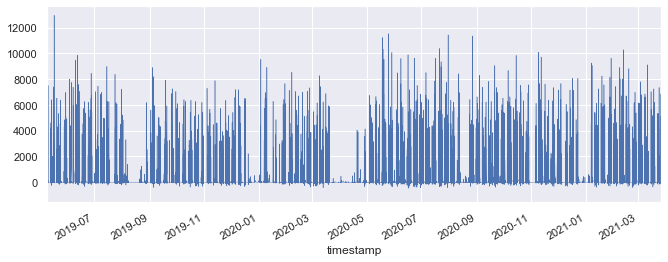

In [16]:
#Plotting the weighings of LoadCell_0
sns.set(rc={'figure.figsize':(11,4)})
weighing_plot=BridgeOrganizedData.set_index('Data')
weighing_plot['cellWeight_0'].plot(linewidth=0.5)

In [17]:
AllRawData

,_id,timestamp,terminalSerialNumber,scaleSerialNumber,scaleGross,scaleNet,cellId_0,cellSerialNumber_0,cellWeight_0,cellId_1,...,cellWeight_4,cellId_5,cellSerialNumber_5,cellWeight_5,cellId_6,cellSerialNumber_6,cellWeight_6,cellId_7,cellSerialNumber_7,cellWeight_7
0,5cd43b63a61883e64fc58409,2019-05-09 14:31:28,160690,P191021852,90.0,90.0,5cd43b63a6188315bac58411,7.45033e+06,0.0,5cd43b63a61883c8c9c58410,...,20.0,5cd43b63a6188331bac5840c,7.45034e+06,40.0,5cd43b63a618837c6fc5840b,7.45034e+06,10.0,5cd43b63a618834a57c5840a,7.45034e+06,30.0
1,5cd43e7ba61883a9bbc5845a,2019-05-09 14:44:40,160690,P191021852,10.0,10.0,5cd43e7ba618831a3ec5845e,7.45034e+06,0.0,5cd43e7ba618832c0cc5845d,...,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN
2,5cd43f90a618832d94c58476,2019-05-09 14:49:17,160690,P191021852,0.0,0.0,5cd43f90a61883e2f4c5847e,7.45033e+06,0.0,5cd43f90a61883c5b7c5847d,...,0.0,5cd43f90a61883c27dc58479,7.45034e+06,0.0,5cd43f90a61883799ec58478,7.45034e+06,0.0,5cd43f90a61883c9e6c58477,7.45034e+06,0.0
3,5cd4ec35413ec78e8157d0bb,2019-05-10 03:05:52,160690,P191021852,0.0,0.0,5cd4ec35413ec7133d57d0c3,7.45033e+06,0.0,5cd4ec35413ec7200b57d0c2,...,0.0,5cd4ec35413ec7132f57d0be,7.45034e+06,0.0,5cd4ec35413ec7e90957d0bd,7.45034e+06,0.0,5cd4ec35413ec771e557d0bc,7.45034e+06,0.0
4,5cd50870d2665d34f6f08677,2019-05-10 05:06:19,160690,P191021852,0.0,0.0,5cd50870d2665d3008f0867f,7.45033e+06,0.0,5cd50870d2665d046bf0867e,...,0.0,5cd50870d2665d563df0867a,7.45034e+06,0.0,5cd50870d2665d084cf08679,7.45034e+06,0.0,5cd50870d2665dcaa0f08678,7.45034e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254454,5eee2e86c7eced00072abd22,2020-06-20 14:28:49,SN000003,P194402222,1720.0,1720.0,None,None,NaN,None,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
254455,5eee2ec5c7eced00072abd37,2020-06-20 14:29:52,SN000003,P194402222,1720.0,1720.0,None,None,NaN,None,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
254456,5eee2ee0c7eced00072abd3f,2020-06-20 14:30:19,SN000003,P194402222,1720.0,1720.0,None,None,NaN,None,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN
254457,5eee2f07c7eced00072abd4a,2020-06-20 14:30:58,SN000003,P194402222,1720.0,1720.0,None,None,NaN,None,...,NaN,None,None,NaN,None,None,NaN,None,None,NaN


In [18]:
AllRawData.to_csv('D:/MEU/Universidade/Codigo Tese/Dados/'+'RawData.csv')